<a href="https://colab.research.google.com/github/kundan2403/ml-algo/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML clustring algo
1.   K-Means
2.   K-Medoid
3.   Hierarchical clustering algorithms

# K-Means
Clustering is one of the most widely used unsupervised machine learning algorithms for partitioning a dataset into groups, or clusters, based on similarity.

Initialization:

1. Choose the number of clusters  K you want to
   partition the dataset into.
   
2. Randomly initialize  K centroids, which are points
   that represent the center of each cluster. These centroids can be randomly selected from the dataset or initialized in any other way.







Assign Points to Clusters

1. For each data point in the dataset, calculate its distance to each centroid. The distance measure commonly used is the Euclidean distance, although other distance measures can be used as well.

2. Assign each data point to the cluster whose centroid is closest (i.e., has the smallest distance).  



 Update Centroids

1.  After assigning all data points to clusters,  
    update the centroids of each cluster.
2. Compute the mean of all data points assigned to each cluster. This mean becomes the new centroid of the cluster.  



Repeat

Repeat steps 2 and 3 until convergence criteria are met. Common convergence criteria include
1. Centroids do not change significantly between iterations.   
2. Maximum number of iterations is reached.



Convergence

1. Convergence occurs when the centroids stabilize, i.e., when they stop changing significantly between iterations. At this point, the algorithm has reached a stable configuration, and the clusters have been formed.



Final Result

1. After convergence, the algorithm has partitioned the dataset into
   K clusters, and each data point belongs to exactly one cluster.

2. The centroids represent the center of each cluster and can be used for
   further analysis or interpretation of the clusters.




[[5.006      3.418      1.464      0.244     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


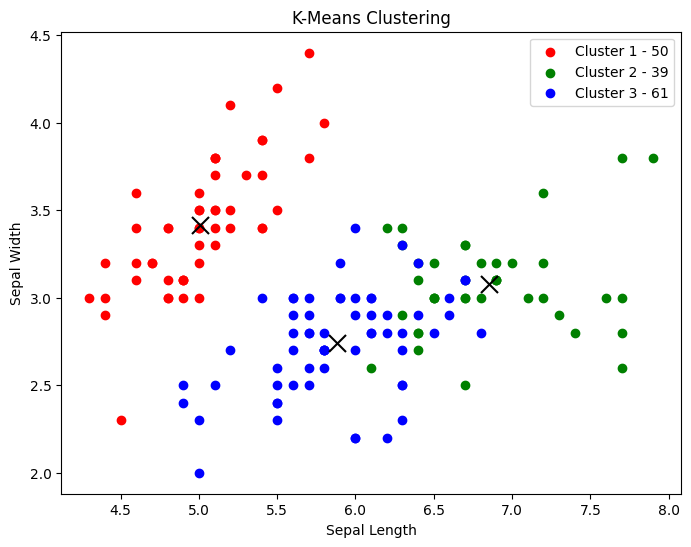

K-Means SSE: 78.94506582597731


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_df = pd.read_csv("/content/data/Iris.csv")
X = iris_df.iloc[:, 1:-1].values  # Features
y = iris_df.iloc[:, 1:-1].values   # Target

# Number of clusters
k = 3

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Function to initialize centroids randomly
def initialize_centroids(data, k):
    centroids = []
    for _ in range(k):
        centroid = data[np.random.choice(range(len(data)))]
        centroids.append(centroid)
    return np.array(centroids)

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# Function to update centroids based on the mean of data points in each cluster
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

# K-Means algorithm
def k_means(data, k):
    centroids = initialize_centroids(data, k)
    iter = 0
    converged = False
    sse = 0

    while not converged:
        iter += 1
        old_centroids = centroids.copy()

        # Assign data points to the nearest centroid
        clusters = assign_clusters(data, centroids)

        # Update centroids based on the mean of data points in each cluster
        centroids = update_centroids(data, clusters, k)

        # Check for convergence
        converged = np.array_equal(old_centroids, centroids)

    # Calculate SSE
    for i in range(k):
        cluster_points = data[clusters == i]
        sse += np.sum((cluster_points - centroids[i])**2)

    return clusters, centroids, sse

# Run K-Means clustering
kmeans_clusters, kmeans_centroids, kmeans_sse = k_means(X, k)

print(kmeans_centroids)

# Plot K-Means clusters
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = X[kmeans_clusters == i]
    _, counts = np.unique(kmeans_clusters, return_counts=True)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1} - { counts[i] }')
    plt.scatter(kmeans_centroids[i, 0], kmeans_centroids[i, 1], marker='x', color='black', s=150)
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
print("K-Means SSE:", kmeans_sse)



# K-medoid

Initialization:

1. Choose the number of clusters K you want to partition the dataset into.

2. Select k random points from the dataset. First, the algorithm selects k
   random points from the dataset as the initial medoids. The medoids that are chosen are used to define the initial k clusters.

Assign Points to Clusters

1. Assign data points to the cluster of the nearest
   medoid. It then assigns each non-medoid to the cluster that has the closest medoid.

2.  Calculate the total sum of distances of data  
    points from their assigned medoids for each medoid.
    It then calculates the cost, i.e., the total sum of distances or dissimilarities of the data points from the assigned medoid.

Update Medoid

1. Swap a non-medoid point with a medoid point and recalculate the cost. It then swaps every non-medoid point with the medoid assigned to it and recalculates the total sum of distances.

2. Undo the swap if the recalculated cost with the new medoid exceeds the previous cost. Finally, it evaluates whether the recalculated cost is more than the previously calculated cost. If this is the case, it undoes the swap, and the algorithm converges. If the recalculated cost is less, it repeats step 4

[[5.  3.4 1.5 0.2]
 [5.7 2.9 4.2 1.3]
 [6.8 3.  5.5 2.1]]


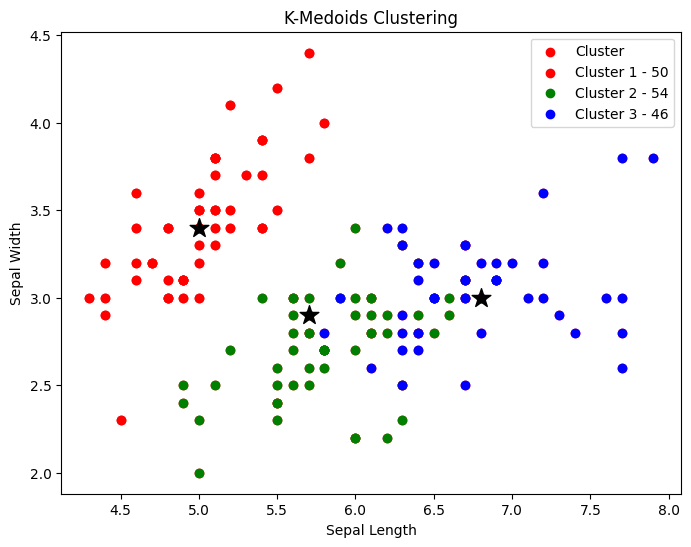

K - Medoids_sse SSE: 85.06


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_df = pd.read_csv("/content/data/Iris.csv")
X = iris_df.iloc[:, 1:-1].values  # Features
iris_df.head()

#Number of cluster
K = 3

# Function to initialize centroids randomly
def initialize_medoids(data, k):
  medoids = []
  for _ in range(k):
    medoid = data[np.random.choice(range(len(data)))]
    medoids.append(medoid)

  return medoids;

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def assign_clusters(data, medoids):
  clusters = []
  for point in data:
    distance = [euclidean_distance(point, medoid) for medoid in medoids]
    cluster = np.argmin(distance)
    clusters.append(cluster)
  return np.array(clusters)

def update_medoids(data, clusters, k):
  new_medoids = np.zeros((k, data.shape[1]))
  for i in range(k):
      cluster_points = data[clusters == i]
      distances_within_cluster = np.sum(np.sqrt(np.sum((cluster_points[:, np.newaxis] - cluster_points[np.newaxis, :]) ** 2, axis=2)), axis=1)
      new_medoids[i] = cluster_points[np.argmin(distances_within_cluster)]
  return new_medoids


def k_medoids(data, k):
  medoids = initialize_medoids(data, k)
  coverage = False
  itr = 0
  sse = 0
  while not coverage:
    itr += 1
    old_medoids = medoids.copy()
    clusters = assign_clusters(data, medoids)
    medoids = update_medoids(data, clusters, k)
    coverage = np.array_equal(old_medoids, medoids)

  for i in range(k):
        cluster_points = data[clusters == i]
        sse += np.sum((cluster_points - medoids[i])**2)

  return clusters, medoids, sse

k_medoid_clusters, k_medoids, k_medoids_sse = k_medoids(X, K)
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))

print(k_medoids)

plt.scatter(X[:, 0], X[:, 1], c='r', label=f'Cluster')
for i in range(K):
  cluster_points = X[k_medoid_clusters == i]
  _, counts = np.unique(k_medoid_clusters, return_counts=True)
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1} - { counts[i] }')
  plt.scatter(k_medoids[i, 0], k_medoids[i, 1], marker='*', color='black', s=200)

plt.title('K-Medoids Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
print("K - Medoids_sse SSE:", k_medoids_sse)

# Hierarchical clustering algorithms

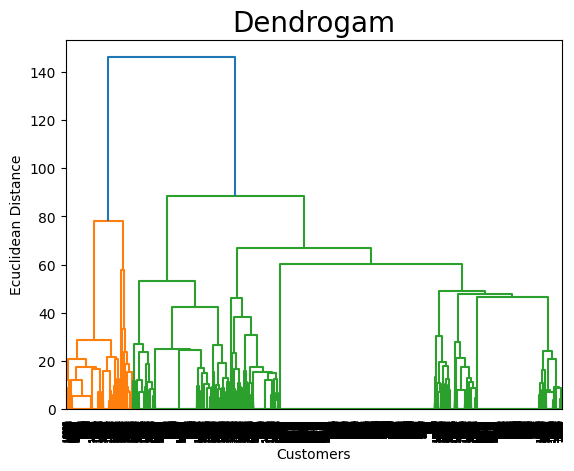

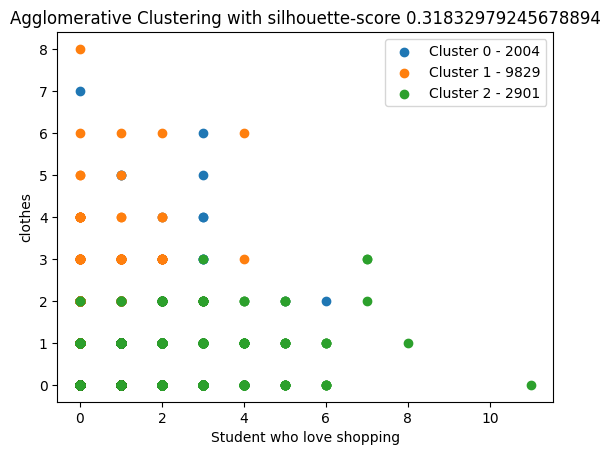

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score

student_data = pd.read_csv("/content/data/students.csv")
student_data = student_data.drop_duplicates()
student_data.isnull().sum()

student_data = student_data.iloc[:, : ]

# Select relevant features related to lifestyle choices
lifestyle_features = student_data[['music', 'shopping', 'clothes', 'hollister', 'abercrombie',
                           'die', 'death', 'drunk', 'drugs']]

def aggromative_clustering(X, cluster):
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  result = AgglomerativeClustering(n_clusters=cluster, linkage='ward')
  y_pred = result.fit_predict(X)
  cluster_labels = result.labels_
  return silhouette_score(X, y_pred), cluster_labels

def print_dendo(X):
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  link_matrix = linkage(X, method='ward')
  dendrogram(link_matrix)


n_clusters = 3
score, cluster_labels = aggromative_clustering(lifestyle_features, 3)

sys.setrecursionlimit(len(lifestyle_features))
print_dendo(lifestyle_features)
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

# Add cluster labels to the dataframe
student_data['Cluster'] = cluster_labels
# # # Plot each cluster's data
for cluster in range(n_clusters):
    cluster_data = student_data[student_data['Cluster'] == cluster]
    plt.scatter(cluster_data['shopping'], cluster_data['clothes'], label=f'Cluster {cluster} - {len(cluster_data)}')

plt.xlabel('Student who love shopping')
plt.ylabel('clothes')
plt.title(f'Agglomerative Clustering with silhouette-score {score}')
plt.legend()
plt.show()
# Get cluster labels for each data point

# DB-SCAN

Best parameters (eps, min_samples): (1.0, 3), Silhouette Score: 0.44
0.4324253880544573 [0 0 1 ... 0 0 0] 14734


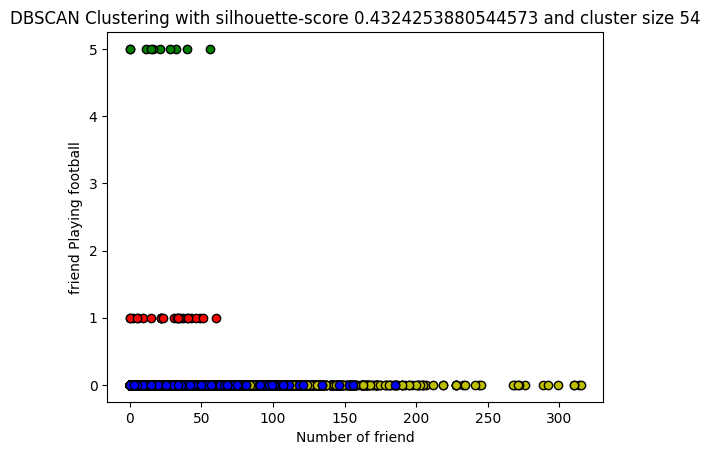

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load student data from CSV file and remove duplicates
student_data = pd.read_csv("/content/data/students.csv")
student_data = student_data.drop_duplicates()

# Check for missing values in the dataset
student_data.isnull().sum()

# Select all columns (replace ":" with the column index range if needed)
student_data = student_data.iloc[:, :]

# Display the first few rows of the dataset
student_data.head()

# Select relevant features related to lifestyle choices
lifestyle_features = student_data[['NumberOffriends', 'basketball', 'football', 'baseball', 'sports']]

# Convert lifestyle features to numpy array for clustering
lifestyle_features = np.array(lifestyle_features)

def DBSCAN_C(X, eps_range, min_samples_range):
    # Standardize features
    silhouette_scores = {}
    best_score_cluster_labels = {}

    for eps in eps_range:
        for min_samples in min_samples_range:
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
            # Perform DBSCAN clustering
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
            cluster_labels = dbscan.fit_predict(X_scaled)
            # Compute silhouette score
            silhouette_avg = silhouette_score(X_scaled, cluster_labels)
            silhouette_scores[(eps, min_samples)] = silhouette_avg
            best_score_cluster_labels[eps] = (cluster_labels, dbscan.core_sample_indices_)

    best_params, best_score = max(silhouette_scores.items(), key=lambda x: x[1])
    print(f"Best parameters (eps, min_samples): {best_params}, Silhouette Score: {best_score:.2f}")
    cluster_labels, core_sample_indices = best_score_cluster_labels[best_params[0]]
    core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
    core_samples_mask[core_sample_indices] = True
    return silhouette_avg, cluster_labels, core_samples_mask

# Define parameter ranges for DBSCAN
eps_range = [0.2, 0.5, 1.0]  # Adjust the range as needed
min_samples_range = [3, 5, 7]  # Adjust the range as needed

# Perform DBSCAN clustering and get silhouette score, cluster labels, and core sample mask
score, cluster_labels, core_samples_mask = DBSCAN_C(lifestyle_features, eps_range, min_samples_range)

print(score, cluster_labels, len(core_samples_mask))

# Determine the number of clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
unique_labels = set(cluster_labels)
colors = ['y', 'b', 'g', 'r']

# Plot clustered data points
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (cluster_labels == k)

    xy = lifestyle_features[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 2], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = lifestyle_features[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 2], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.xlabel("Number of friend")
plt.ylabel("friend Playing football")
plt.title(f'DBSCAN Clustering with silhouette-score {score} and cluster size {n_clusters}')
plt.show()